# **Parcial #3 Metodos Computacionales**


---

Realizado por: Juan Sebastian Pabon Martínez y Karen Polo


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


In [162]:
x= sym.Symbol("x", real= True)
y= sym.Symbol("y",real= True)

z= x+ sym.I*y

def f_com(z):
    f= z**3-1
    return sym.expand(f)

F1=f_com(z)
F= [sym.re(F1),sym.im(F1)]

def jacobiano (Fun):
    M=sym.matrices.Matrix([[sym.diff(Fun[0],x), sym.diff(Fun[0],y)],[sym.diff(Fun[1],x), sym.diff(Fun[1],y)]])
    return M
    

Jacobi= jacobiano(F)
Fn = sym.lambdify([x,y],F,'numpy')
Jn= sym.lambdify([x,y],Jacobi,'numpy')



In [156]:
def newton_raphson_Generalizado(f, J,x0, tol=1e-6, maxit=100):
    x = x0
    for i in range(maxit):
        fx = f(x[0],x[1])
        Jx= J(x[0],x[1])
        Jx= np.linalg.inv(Jx)
        sol = np.dot(Jx,fx)
        x= x-sol
    return x

p = np.array([0.5, 0.5])
newton_raphson_Generalizado(Fn,Jn,p)

array([-0.5      ,  0.8660254])

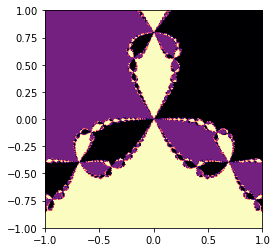

In [163]:
N=300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

Fractal = np.zeros((N,N),np.int64)

raices = np.array([[-0.5, np.sqrt(3)*0.5], [-0.5, -np.sqrt(3)*0.5], [1, 0]])
index= [20,100,255]

for i in range(N):
    xi=x[i]
    for j in range(N):
        yi=y[j]
        point=[xi,yi]
        raiz= newton_raphson_Generalizado(Fn,Jn,point)
        for k, root in enumerate(raices):
            if np.linalg.norm(raiz - root) < 1e-7:
                Fractal[i, j] = index[k]
    
plt.imshow(Fractal, cmap='magma' ,extent=[-1,1,-1,1])